# Classifying and Predicting both position and overall stat of a football player

## Welcome to this potfolio project that aims at analyzing a football dataset based on a video game scraped on Kaggle.

### The aim to classify  `my` position on the field and predict my stat based on individual stats .

   - KNN : K Nearest Neighbor is a classification model that can be used for classification
   
   - L.R. : Linear Regression is a regression model to predict my numeric overall stat


The Classification will be considered on players with equal dimensions (`stats`).

 All players have the following:
    
`Position	   Age	   Overall 	Pace	Shooting	 Passing	Dribbling	Defending	Physicality	Acceleration	 Sprint 	Positioning	  Finishing	   Shot	   Long	  Volleys	Penalties	Vision	Crossing	  Free  	Curve	Agility	Balance	Reactions	Ball	Composure	Interceptions	Heading	Def	Standing	Sliding  	Jumping	  Stamina	  Strength  	Aggression	 Weak foot Skill moves GK` 

In [638]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display

In [639]:
players = pd.read_csv("male_players csv")
print(players.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15845 entries, 0 to 15844
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           15845 non-null  object 
 1   Position       15845 non-null  object 
 2   Age            15845 non-null  int64  
 3   Overall        15845 non-null  int64  
 4   Pace           15845 non-null  int64  
 5   Shooting       15845 non-null  int64  
 6   Passing        15845 non-null  int64  
 7   Dribbling      15845 non-null  int64  
 8   Defending      15845 non-null  int64  
 9   Physicality    15845 non-null  int64  
 10  Acceleration   15845 non-null  int64  
 11  Sprint         15845 non-null  int64  
 12  Positioning    15845 non-null  int64  
 13  Finishing      15845 non-null  int64  
 14  Shot           15845 non-null  int64  
 15  Long           15845 non-null  int64  
 16  Volleys        15845 non-null  int64  
 17  Penalties      15845 non-null  int64  
 18  Vision

In [640]:
players.head()

,Name,Position,Age,Overall,Pace,Shooting,Passing,Dribbling,Defending,Physicality,...,Def,Standing,Sliding,Jumping,Stamina,Strength,Aggression,Weak foot,Skill moves,GK
0,Kylian Mbappé,ST,24,91,97,90,80,93,36,78,...,26,34,32,88,88,77,64,4,5,NaN
1,Erling Haaland,ST,23,91,89,93,66,79,45,88,...,38,47,29,93,76,93,87,3,3,NaN
2,Kevin De Bruyne,CM,32,91,72,88,94,86,65,78,...,66,70,53,72,88,74,75,5,4,NaN
3,Lionel Messi,CF,36,90,80,87,90,96,33,64,...,20,35,24,71,70,68,44,4,4,NaN
4,Karim Benzema,CF,35,90,79,88,83,87,39,78,...,43,24,18,85,82,82,63,4,4,NaN


In [641]:
# What is the number of players that are recorded?

print(f"{len(players)} players") 

15845 players


In [642]:
players.columns

Index(['Name', 'Position', 'Age', 'Overall', 'Pace', 'Shooting', 'Passing',
       'Dribbling', 'Defending', 'Physicality', 'Acceleration', 'Sprint',
       'Positioning', 'Finishing', 'Shot', 'Long', 'Volleys', 'Penalties',
       'Vision', 'Crossing', 'Free', 'Curve', 'Agility', 'Balance',
       'Reactions', 'Ball', 'Composure', 'Interceptions', 'Heading', 'Def',
       'Standing', 'Sliding', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Weak foot', 'Skill moves', 'GK'],
      dtype='object')

In [643]:
# Lets find the basic statistic summaries for the base stats + the age

players[["Age","Overall","Pace","Shooting","Passing","Dribbling","Physicality"]].describe()

,Age,Overall,Pace,Shooting,Passing,Dribbling,Physicality
count,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000,15845.000000
mean,25.848659,66.321174,68.133481,54.140738,58.532281,56.299085,65.456990
std,4.677433,6.685503,10.721206,13.716321,9.595001,18.827593,9.567424
min,17.000000,47.000000,27.000000,19.000000,25.000000,5.000000,29.000000
25%,22.000000,62.000000,62.000000,44.000000,52.000000,51.000000,59.000000
50%,25.000000,66.000000,69.000000,57.000000,59.000000,62.000000,66.000000
75%,29.000000,70.000000,75.000000,64.000000,65.000000,68.000000,72.000000
max,43.000000,91.000000,97.000000,93.000000,94.000000,96.000000,90.000000


In [644]:
# Are there any missing values?
players.isna().any()

Name             False
Position         False
Age              False
Overall          False
Pace             False
Shooting         False
Passing          False
Dribbling        False
Defending        False
Physicality      False
Acceleration     False
Sprint           False
Positioning      False
Finishing        False
Shot             False
Long             False
Volleys          False
Penalties        False
Vision           False
Crossing         False
Free             False
Curve            False
Agility          False
Balance          False
Reactions        False
Ball             False
Composure        False
Interceptions    False
Heading          False
Def              False
Standing         False
Sliding          False
Jumping          False
Stamina          False
Strength         False
Aggression       False
Weak foot        False
Skill moves      False
GK                True
dtype: bool

In [645]:
# The missing field related to the goalkeeping ability as all positions (excluding the Goal keeper) do not require it.
# This means that the data is "Not Missing At Random" or NMAR, therefore the data is logically missing.
# The easiest way is to evaluate it as 0 (assuming that the player actually has no goal keeping capabilities)

players.fillna({'GK':0},inplace=True)
players.GK.isna().any()

False

### What are the positions is this set?

In [646]:
players.Position.unique()

array(['ST', 'CM', 'CF', 'GK', 'RW', 'CB', 'LW', 'CDM', 'CAM', 'RM', 'LB',
       'RB', 'LM', 'LWB', 'RWB'], dtype=object)

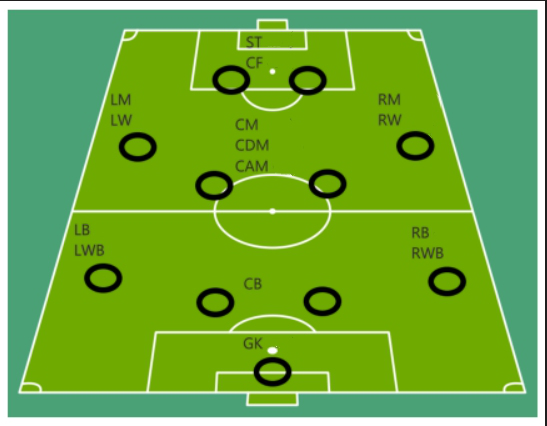

In [647]:
# Here is how usually they are spread across the field

img = Image.open('formation.jpg')
display(img)

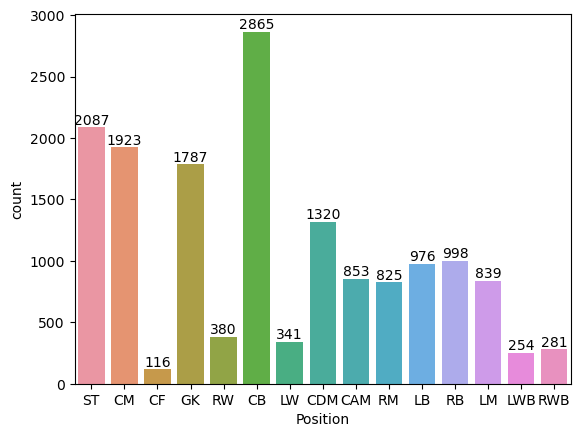

<Figure size 640x480 with 0 Axes>

In [648]:
# Count plot

ax = sns.countplot(x = "Position",data = players)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

## It looks like that `CB` is the most seen position followed by `ST`, while `CF` and `LWB` are the least.

## What are the overall stats and the spread of stats

In [649]:
players.Overall.unique()

array([91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75,
       74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58,
       57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47], dtype=int64)

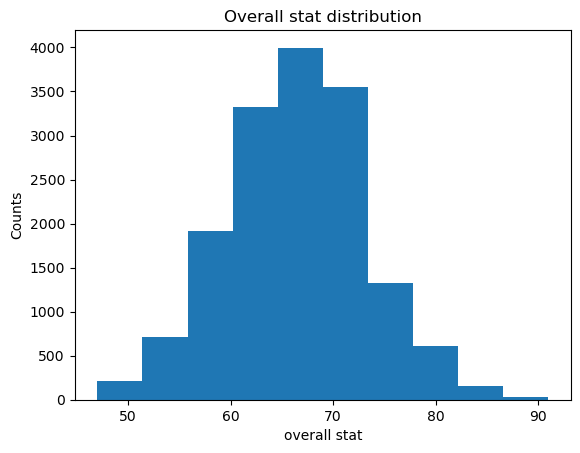

<Figure size 640x480 with 0 Axes>

In [650]:
plt.hist(players.Overall)
plt.xlabel("overall stat")
plt.ylabel("Counts")
plt.title("Overall stat distribution")
plt.show()
plt.clf()

In [651]:
print(f"The average overall stat is {players.Overall.mean()}")

The average overall stat is 66.32117387188387


-------------------------------------
 # KNN model implementation 
-------------------------------------

The scikit-learn's KNN implementation uses `Euclidean Distance` fromula to calculate distances between dimensions of objects

The General Formula :
                            d = ((a1 - b1)^2 + (a2 - b2)^2  + ........ + (an - bn)^2)^(1/2)        
                            
                              eq. Euclidean distance between two "objects" for n dimensions  
                              (Both are obligated to have the same dimensions)


Another metric envolves using `Manhattan Distance` formula 

The General Formula:
                            d = |a1 - b1| + |a2 - b2| + ........ + |an - bn|

                            eq. Manhattan distance between two "objects" for n dimensions  
                            (Both are obligated to have the same dimensions)

In [652]:
# Features 
Stats = players[["Age", "Overall", "Pace", "Shooting", "Passing", "Dribbling", "Defending", "Physicality"]]

# Target variable
Position = players['Position']


# Create the KNN classifier and scaler objects
knnmodel = KNeighborsClassifier()
scalerknn = MinMaxScaler() # Min MAX --> Lowest value -> 0 and The highest -> 1 (A very basic scaling technique)
scalerknn.fit(Stats)

Stats = scalerknn.transform(Stats)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(Stats, Position, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
parameter_grid = {'n_neighbors': np.arange(1, 21)}  # k values



# Create and run GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=knnmodel, param_grid=parameter_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters and cross-validation scores
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Extract the best k value
best_k = grid_search.best_params_['n_neighbors']

# Print the best k value in a clear message
print(f"The best k value found by GridSearchCV is: {best_k}")

knnmodel.set_params(n_neighbors=best_k)
knnmodel.fit(x_train, y_train)  

Best parameters: {'n_neighbors': 19}
Best cross-validation score: 0.619359409901754
The best k value found by GridSearchCV is: 19


KNeighborsClassifier(n_neighbors=19)

In [653]:
# Calculate training accuracy
train_accuracy = knnmodel.score(x_train, y_train)

# Make predictions
y_pred = knnmodel.predict(x_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"KNN Model Metrics:")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall} \n \n")

KNN Model Metrics:
Training Accuracy: 0.6608551593562638
Testing Accuracy: 0.606816030293468
Precision: 0.5644240439571737
Recall: 0.606816030293468 
 



E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---------------------------
# Linear Regression
---------------------------

In [654]:
# Features 
Stats = players[["Age","Pace", "Shooting", "Passing", "Dribbling", "Defending", "Physicality"]]

# Target variable
Overall = players['Overall']

# Scaling
scalerlr = MinMaxScaler()
scalerlr.fit(Stats)
Stats = scalerlr.transform(Stats)


lrmodel = LinearRegression()

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(Stats, Overall, test_size=0.2, random_state=42)

lrmodel.fit(x_train,y_train)

# Understanding the wieghts
print(f"coef = {lrmodel.coef_}, intercepts = {lrmodel.intercept_}")

print(f"score = {lrmodel.score(x_train,y_train)}")    

coef = [ 2.04192442  5.65618994  5.80637445 19.19982399  3.96815188  5.20801006
 16.50500648], intercepts = 35.60600061551901
score = 0.7280689713902659


In [655]:
y_pred = lrmodel.predict(x_test)

y_pred


array([68.13829638, 82.7616871 , 68.14470424, ..., 70.39312403,
       62.82725704, 64.02681255])

In [656]:
# mean squared error
mse = mean_squared_error(y_test, y_pred)

#R-squared score
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}") # Similar to .score

Linear Regression Model Metrics:
Mean Squared Error: 12.198075818506272
R-squared: 0.7285069338621137


In [657]:
#----------------------------------------------------------
#my stats:

# knn Stats = players[["Age", "Overall", "Pace", "Shooting", "Passing", "Dribbling", "Defending", "Physicality"]]
    
my_stats_k = np.array([24,70,66,70,77,71,65,50]).reshape(1,8)
scaled_stats_k = scalerknn.transform(my_stats_k)

E:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [658]:
#----------------------------------------------------------
#my stats:
# LR Stats = players[["Age","Pace", "Shooting", "Passing", "Dribbling", "Defending", "Physicality"]]
    
my_stats_lr = np.array([23,66,70,77,71,65,50]).reshape(1,7)
scaled_stats_lr = scalerlr.transform(my_stats_lr)

E:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [659]:
# First attempt at classification and Prediction

print(f"Your position = {knnmodel.predict(scaled_stats_k)}")
print(f"Your Overall stat = {lrmodel.predict(scaled_stats_lr)}")

Your position = ['CM']
Your Overall stat = [69.77862023]


## The model predicted a position of `CM` which aligned with what was expected and a similar `overall stat` as well

## The next part will try to deal with outliers in order to see how it affects the models

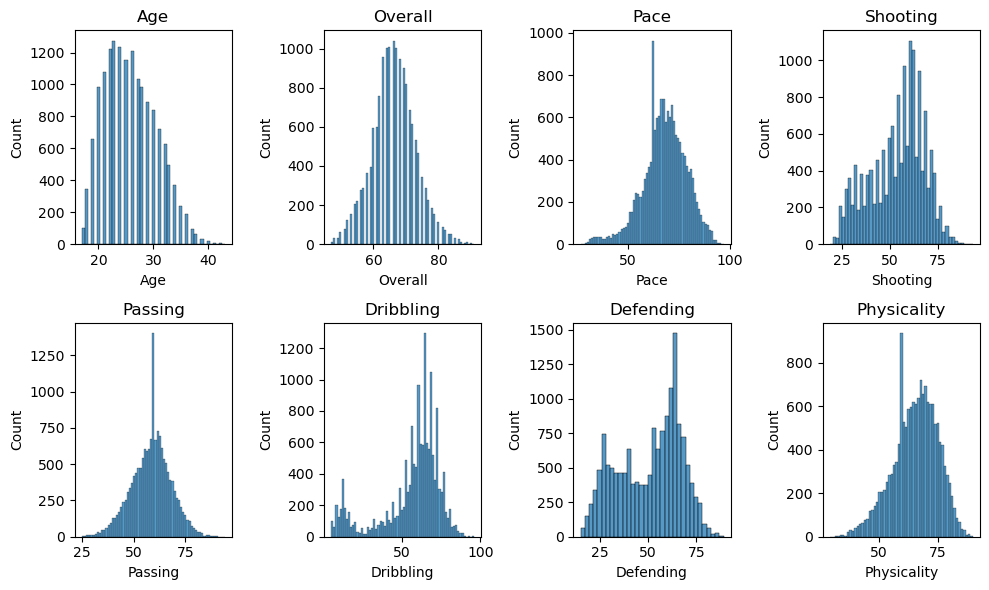

<Figure size 640x480 with 0 Axes>

In [660]:
# We will look at the distribution of ages and overall stats
variables = ["Age", "Overall", "Pace", "Shooting", "Passing", "Dribbling", "Defending", "Physicality"]

# Create a figure and axis objects
fig, axs = plt.subplots(2, 4, figsize=(10, 6))

axs = axs.flatten()

for i, var in enumerate(variables):
    sns.histplot(players[var], ax=axs[i])
    axs[i].set_title(var)


plt.tight_layout()
plt.show()
plt.clf()
    

In [661]:
age_iqr = np.percentile(players.Age,75) - np.percentile(players.Age,25)
pace_iqr = np.percentile(players.Pace,75) - np.percentile(players.Pace,25)
shooting_iqr = np.percentile(players.Shooting,75) - np.percentile(players.Shooting,25)
physicality_iqr = np.percentile(players.Physicality,75) - np.percentile(players.Physicality,25)

print(f"""
IQR

AGE = {age_iqr}
Pace = {pace_iqr}
Shooting = {shooting_iqr}
Physicality = {physicality_iqr}
""")


IQR

AGE = 7.0
Pace = 13.0
Shooting = 20.0
Physicality = 13.0



### The inter quantile range is the difference between the 75th percentile and the 25th providing a measure for 50% of the data. It will be used to limit the data and filter outliers

#### Focusing on skewed variables by bounding.


In [662]:
lower_bound_age = np.percentile(players.Age, 25) - 1.5 * age_iqr
upper_bound_age = np.percentile(players.Age, 75) + 1.5 * age_iqr


lower_bound_pace = np.percentile(players.Pace, 25) - 1.5 * pace_iqr
upper_bound_pace = np.percentile(players.Pace, 75) + 1.5 * pace_iqr

lower_bound_shooting = np.percentile(players.Shooting, 25) - 1.5 * shooting_iqr
upper_bound_shooting = np.percentile(players.Shooting, 75) + 1.5 * shooting_iqr


lower_bound_physicality = np.percentile(players.Physicality, 25) - 1.5 * physicality_iqr
upper_bound_physicality = np.percentile(players.Physicality, 75) + 1.5 * physicality_iqr

filtered_players = players[
    (players['Age'] >= lower_bound_age) & (players['Age'] <= upper_bound_age) &
    (players['Pace'] >= lower_bound_pace) & (players['Pace'] <= upper_bound_pace) &
    (players['Shooting'] >= lower_bound_shooting) & (players['Shooting'] <= upper_bound_shooting) &
    (players['Physicality'] >= lower_bound_physicality) & (players['Physicality'] <= upper_bound_physicality)
]

In [663]:
#--------------------------------------------------------------------------------
# Attempting knn after filtering outliers

# Features 
filtered_Stats = filtered_players[["Age", "Overall", "Pace", "Shooting", "Passing", "Dribbling", "Defending", "Physicality"]]

# Target variable
filtered_Position = filtered_players['Position']

# Scale features
scalerknn.fit(filtered_Stats)
filtered_Stats_scaled = scalerknn.transform(filtered_Stats)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(filtered_Stats_scaled, filtered_Position, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
parameter_grid = {'n_neighbors': np.arange(1, 21)}  # k values

# Create and run GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=knnmodel, param_grid=parameter_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters and cross-validation scores
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Extract the best k value
best_k = grid_search.best_params_['n_neighbors']

# Print the best k value
print(f"The best k value found by GridSearchCV is: {best_k}")

# Set the best k value and fit the model
knnmodel.set_params(n_neighbors=best_k)
knnmodel.fit(x_train, y_train)  

# Calculate training accuracy
train_accuracy = knnmodel.score(x_train, y_train)

# Make predictions
y_pred = knnmodel.predict(x_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"\nKNN Model Metrics after Filtering Outliers:")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall} \n \n")
#--------------------------------------------------------------------------------

# Linear Regression after filtering outliers

# Features 
filtered_Stats_lr = filtered_players[["Age","Pace", "Shooting", "Passing", "Dribbling", "Defending", "Physicality"]]

# Target variable
filtered_Overall = filtered_players['Overall']

# Scale features
scalerlr.fit(filtered_Stats_lr)
filtered_Stats_lr_scaled = scalerlr.transform(filtered_Stats_lr)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(filtered_Stats_lr_scaled, filtered_Overall, test_size=0.2, random_state=42)

# Fit linear regression model
lrmodel.fit(x_train, y_train)

# Make predictions
y_pred = lrmodel.predict(x_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Metrics after Filtering Outliers:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Predicting with the filtered data

# Define your stats
my_stats_k = np.array([24, 70, 66, 70, 77, 71, 65, 50]).reshape(1, 8)
my_stats_lr = np.array([23, 66, 70, 77, 71, 65, 50]).reshape(1, 7)

# Scale your stats
scaled_stats_k = scalerknn.transform(my_stats_k)
scaled_stats_lr = scalerlr.transform(my_stats_lr)

# Predict position using KNN
position_prediction = knnmodel.predict(scaled_stats_k)

# Predict overall stat using Linear Regression
overall_prediction = lrmodel.predict(scaled_stats_lr)

print(f"\nYour predicted position: {position_prediction}")
print(f"Your predicted overall stat: {overall_prediction}")

Best parameters: {'n_neighbors': 19}
Best cross-validation score: 0.6118300419805891
The best k value found by GridSearchCV is: 19

KNN Model Metrics after Filtering Outliers:
Training Accuracy: 0.6506386787079977
Testing Accuracy: 0.602993817116824
Precision: 0.5523432495219774
Recall: 0.602993817116824 
 

Linear Regression Model Metrics after Filtering Outliers:
Mean Squared Error: 12.156810406133946
R-squared: 0.7303597902560997

Your predicted position: ['CM']
Your predicted overall stat: [69.68947924]


E:\ANACONDA\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
E:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Before addressing Outliers:

`KNN Model Metrics:`


Training Accuracy: 66.09%,
Testing Accuracy: 60.68%,
Precision: 56.44%,
Recall: 60.68%,

`Linear Regression Model Metrics:`


Training R-squared: 72.81%,
Mean Squared Error: 12.20



Predicted Position: CM
Predicted Overall Stat: 69.78


## After addressing Outliers:

`KNN Model Metrics:`
Training Accuracy: 65.06%,
Testing Accuracy: 60.30%,
Precision: 55.23%,
Recall: 60.30%,

`Linear Regression Model Metrics:`
Mean Squared Error: 12.16,
R-squared: 73.04%



Predicted Position: CM
Predicted Overall Stat: 69.69


The changes in the KNN model's metrics after outlier removal are negligible, with a slight decrease in training accuracy and no significant change in testing accuracy, precision, or recall.

In the Linear Regression model, after removing outliers, there is a slight improvement in the mean squared error and a slightly higher R-squared value, indicating a slightly better fit of the model to the data. The predicted position and overall stat remain the same after outlier removal.

-------------------------------------------------------------------
## Using all variables in classification and prediction
------------------------------------------------------------------

In [664]:
# Features 
Stats = players.loc[:, ~players.columns.isin(['Position','Name'])]

# Target variable
Position = players['Position']


# Create the KNN classifier and scaler objects
knnmodel = KNeighborsClassifier()
scalerknn = MinMaxScaler() # Min MAX --> Lowest value -> 0 and The highest -> 1 (A very basic scaling technique)
scalerknn.fit(Stats)

Stats = scalerknn.transform(Stats)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(Stats, Position, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
parameter_grid = {'n_neighbors': np.arange(1, 21)}  # k values



# Create and run GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=knnmodel, param_grid=parameter_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters and cross-validation scores
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Extract the best k value
best_k = grid_search.best_params_['n_neighbors']

# Print the best k value in a clear message
print(f"The best k value found by GridSearchCV is: {best_k}")

knnmodel.set_params(n_neighbors=best_k)
knnmodel.fit(x_train, y_train)  

# Calculate training accuracy
train_accuracy = knnmodel.score(x_train, y_train)

# Make predictions
y_pred = knnmodel.predict(x_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"\nKNN Model Metrics:")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall} \n \n")

#---------------------------
# Linear Regression
#---------------------------

# Features 
Stats = players.loc[:, ~players.columns.isin(['Position', 'Overall','Name'])]

# Target variable
Overall = players['Overall']

# Scaling
scalerlr = MinMaxScaler()
scalerlr.fit(Stats)
Stats = scalerlr.transform(Stats)


lrmodel = LinearRegression()

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(Stats, Overall, test_size=0.2, random_state=42)

lrmodel.fit(x_train,y_train)

# Understanding the wieghts
print(f"coef = {lrmodel.coef_}, intercepts = {lrmodel.intercept_}")

print(f"score is = {lrmodel.score(x_train,y_train)}")    

y_pred = lrmodel.predict(x_test)

y_pred

# mean squared error
mse = mean_squared_error(y_test, y_pred)

# R-squared score
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#----------------------------------------------------------

"""
['Name','Position', 'Age', 'Overall', 'Pace', 'Shooting', 'Passing',
       'Dribbling', 'Defending', 'Physicality', 'Acceleration', 'Sprint',
       'Positioning', 'Finishing', 'Shot', 'Long', 'Volleys', 'Penalties',
       'Vision', 'Crossing', 'Free', 'Curve', 'Agility', 'Balance',
       'Reactions', 'Ball', 'Composure', 'Interceptions', 'Heading', 'Def',
       'Standing', 'Sliding', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Weak foot', 'Skill moves', 'GK']
"""

#random stats:
    
random_stats_k = np.array([24,70,66,70,77,65,
       50, 50, 55, 60,
       80, 71, 72, 68, 77, 80,
       83, 66, 55, 54, 53, 64,
       70, 78, 67, 53, 51, 58,
       52, 61, 60, 52, 65, 44,
       2, 4, 0]).reshape(1,37) 
scaled_stats_k = scalerknn.transform(random_stats_k)

#----------------------------------------------------------
#random stats:
    
random_stats_lr = np.array([24,66,70,77,65,
       50, 50, 55, 60,
       80, 71, 72, 68, 77, 80,
       83, 66, 55, 54, 53, 64,
       70, 78, 67, 53, 51, 58,
       52, 61, 60, 52, 65, 44,
       2, 4, 0]).reshape(1,36)
scaled_stats_lr = scalerlr.transform(random_stats_lr)



print(f"\nYour position = {knnmodel.predict(scaled_stats_k)}")
print(f"Your Overall stat = {lrmodel.predict(scaled_stats_lr)}")

Best parameters: {'n_neighbors': 20}
Best cross-validation score: 0.6468125423876455
The best k value found by GridSearchCV is: 20

KNN Model Metrics:
Training Accuracy: 0.6871252761123383
Testing Accuracy: 0.6453139791732407
Precision: 0.6021755448746283
Recall: 0.6453139791732407 
 

coef = [ 1.31022237 15.78635864  2.36347153  9.42522908  1.99494678  7.8796548
  9.0384886  -6.46320548 -6.72341798 -4.39703217 -0.29550603  7.01659893
 -3.92522416 -1.18154053  0.26066405 -4.84358625  0.30208534 -0.95937335
 -1.0148105  -1.13945666 -0.81821979 18.31642255 13.7903473   5.82306502
 -3.99951218  4.90389205  0.57416199 -1.47484463 -0.28407181  2.09860818
 -1.19831864 -3.88443604 -2.23427571 -0.25749212  3.82200965  3.62091006], intercepts = 34.72974725808018
score is = 0.8990012528358369
Linear Regression Model Metrics:
Mean Squared Error: 4.458260500471744
R-squared: 0.9007723159846107

Your position = ['CM']
Your Overall stat = [71.90273127]


E:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
E:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## Before Using All Variables:
`KNN Model Metrics:`

Training Accuracy: 0.6609
Testing Accuracy: 0.6068
Precision: 0.5644
Recall: 0.6068



`Linear Regression Model Metrics:`

R-squared: 0.7285
Mean Squared Error: 12.1981

## After Using All Variables:




`KNN Model Metrics:`

Training Accuracy: 0.6871
Testing Accuracy: 0.6453
Precision: 0.6022
Recall: 0.6453


`Linear Regression Model Metrics:`

R-squared: 0.9008
Mean Squared Error: 4.4583




## Results Summary:
`KNN Model:`

Training accuracy increased from 66.09% to 68.71%. -
Testing accuracy improved from 60.68% to 64.53%. -
Precision increased from 56.44% to 60.22%. -
Recall improved from 60.68% to 64.53%. -


`Linear Regression Model:`


R-squared value increased significantly from 0.7285 to 0.9008. -
Mean Squared Error decreased from 12.1981 to 4.4583.



The overall performance of both models improved after using all necessary variables. Linear regression showed a substantial increase in performance, indicating that the additional variables provided valuable information for predicting the target variable. Similarly, the KNN model also showed improvements across all metrics, indicating better classification performance after incorporating all variables.